# Support Vector Regression (SVR)

## Importing the libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [34]:
data_set = pd.read_csv('/content/Position_Salaries.csv')
X=data_set.iloc[:,1:-1].values
y=data_set.iloc[:,-1].values

In [35]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [36]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [52]:
y=y.reshape(len(y),1) #here we are reshaping because 1-D array cannot be used in fit_transform as it expects the input to be in 2-d form.

## Feature Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
X=sc_x.fit_transform(X)        #can use same sc for both
y=sc_y.fit_transform(y)

In [39]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [40]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [41]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf') # gausian radial basis function(rbf) formula like -ive exp of distances
regressor.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [42]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])))

array([170370.0204065])

## Visualising the SVR results

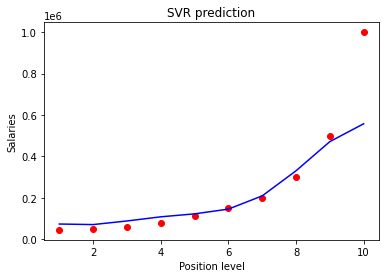

In [50]:
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(sc_x.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X)),color='blue')
plt.xlabel('Position level')
plt.ylabel('Salaries')
plt.title('SVR prediction')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

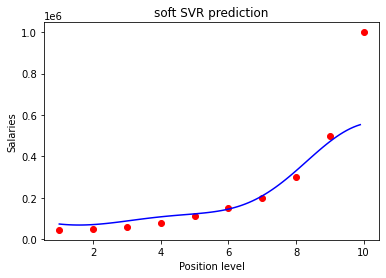

In [51]:
x_grid = np.arange(min(sc_x.inverse_transform(X)),max(sc_x.inverse_transform(X)),0.1)
x_grid = x_grid.reshape(len(x_grid),1)
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(x_grid,sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid))),color='blue')
plt.xlabel('Position level')
plt.ylabel('Salaries')
plt.title('soft SVR prediction')
plt.show()